<a href="https://colab.research.google.com/github/Alfredo-Martin-Gil/TFM_Cardiovascular_AI/blob/main/TFM_Cardiovascular_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **¿Qué hace este bloque?**

Importación de las siguientes bibliotecas:

pandas y numpy para la manipulación de datos.

matplotlib y seaborn para visualización de gráficos.

sklearn para el preprocesamiento, modelado y evaluación del rendimiento del modelo.

lightgbm para el modelo de gradiente optimizado.


In [8]:
# Importación de bibliotecas para manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Modelado predictivo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Configuración de estilos para gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Configuración para evitar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')


### **¿Qué hace este bloque?**

1- Carga de cardio_train.csv sin cambios.

2- Carga de heart_disease.csv con verificación:

  Intenta cargar con delimiter=';'.
  Si el dataset queda en una sola columna, intenta de nuevo sin delimitador.

3- Visualización de las primeras filas para asegurarse de que los datos se cargaron correctamente.

4- Revisión de la estructura con .info().

In [15]:
# --- Carga de datasets desde GitHub ---

# 1. Clonar el repositorio (solo la primera vez en cada sesión de Colab)
!git clone https://github.com/Alfredo-Martin-Gil/TFM_Cardiovascular_AI.git

# 2. Definir la ruta a la carpeta /data dentro del repo
data_path = "/content/TFM_Cardiovascular_AI/data/"

# 3. Cargar datasets (ambos usan separador ;)
import pandas as pd

heart_data = pd.read_csv(data_path + "heart_disease.csv", sep=";")
cardio_data = pd.read_csv(data_path + "cardio_train.csv", sep=";")

# 4. Vista previa de las primeras filas
print("Heart Disease:")
display(heart_data.head())

print("\nCardio Train:")
display(cardio_data.head())

# 5. Info general de los datasets
print("\nInformación Heart Disease:")
heart_data.info()

print("\nInformación Cardio Train:")
cardio_data.info()


fatal: destination path 'TFM_Cardiovascular_AI' already exists and is not an empty directory.
Heart Disease:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



Cardio Train:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



Información Heart Disease:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory u

### **¿Qué hace este bloque?**

### **Análisis del Dataset cardio_train.csv**

1- Distribución de la Variable Objetivo:

Muestra el balance entre las clases (con o sin enfermedad).

2- Matriz de Correlación:

Identifica la relación entre variables numéricas.

3- Detección de Outliers:

Usa diagramas de caja para detectar valores atípicos en variables clave.

4- Distribución de Variables Clave:

Visualiza cómo se distribuyen variables importantes según la presencia o ausencia de enfermedad.


### **Análisis del Dataset heart_disease.csv**

Distribución de la Variable Objetivo (TenYearCHD):

Se representa gráficamente la distribución de la variable TenYearCHD, que indica la probabilidad de desarrollar una enfermedad cardiovascular en los próximos 10 años (1) o no (0).

Matriz de Correlación:

Se calcula la matriz de correlación para evaluar la relación entre variables clínicas como la presión arterial, el colesterol y la frecuencia cardíaca. Esto ayuda a identificar asociaciones que podrían ser relevantes para el análisis predictivo.

Detección de Outliers:

Se realiza un análisis de outliers en variables como sysBP (presión sistólica), diaBP (presión diastólica), totChol (colesterol total) y heartRate (frecuencia cardíaca) para identificar valores extremos que podrían afectar el rendimiento del modelo.

Distribución de Variables Clave por Clase:

Se analizan variables importantes (age, sysBP, diaBP, totChol, heartRate) comparando su distribución en individuos con y sin enfermedad cardiovascular, lo que permite detectar diferencias significativas entre ambos grupos.

### **Objetivo del Análisis Exploratorio**
El EDA proporciona una visión integral de los datos, permitiendo:

1- Identificar patrones y tendencias relevantes para la predicción de enfermedades cardiovasculares.

2- Detectar posibles problemas en la calidad de los datos, como valores atípicos o distribuciones sesgadas.

3- Guiar la selección de variables para el desarrollo de modelos predictivos más precisos.

Este análisis es fundamental para comprender el comportamiento de los datos antes de aplicar técnicas de aprendizaje automático.


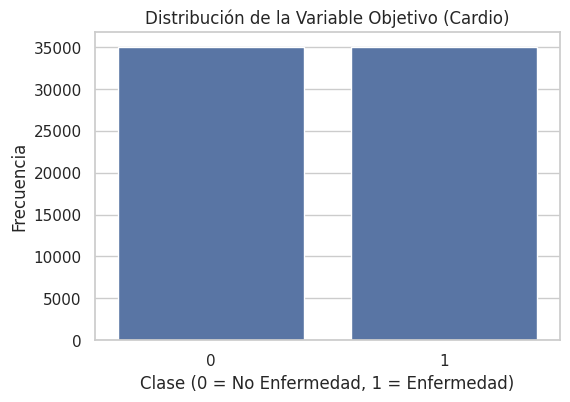

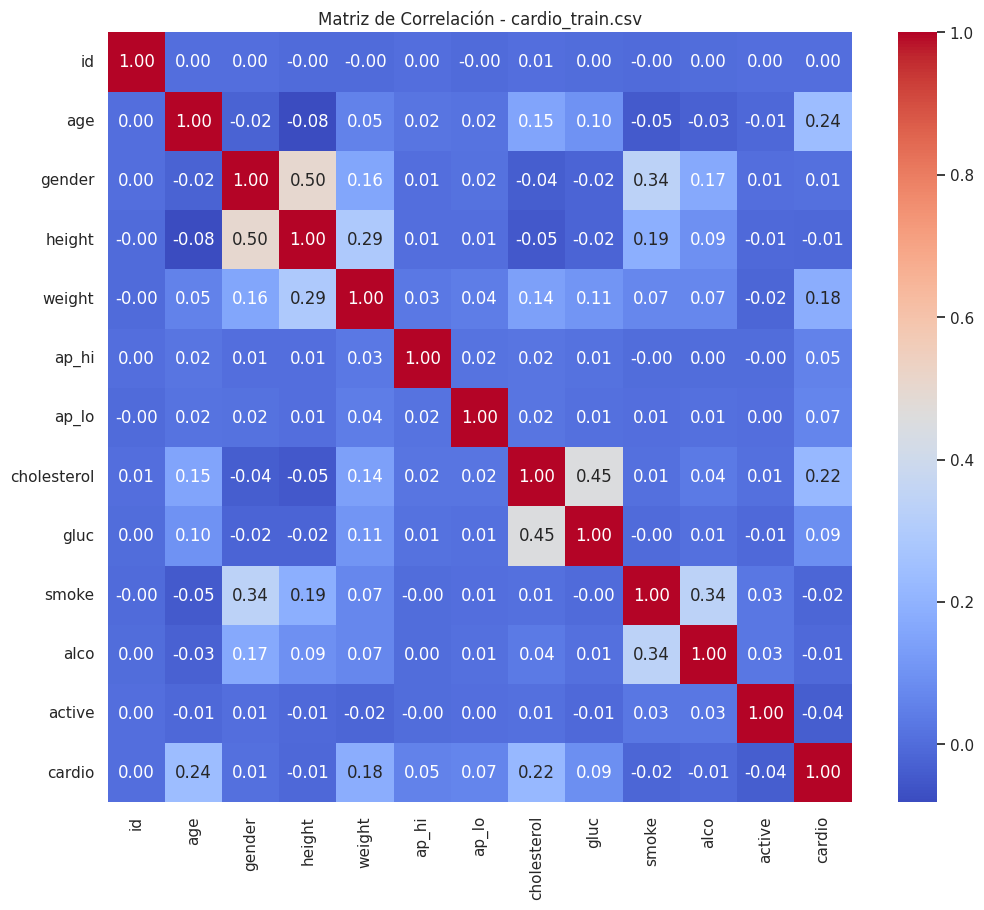

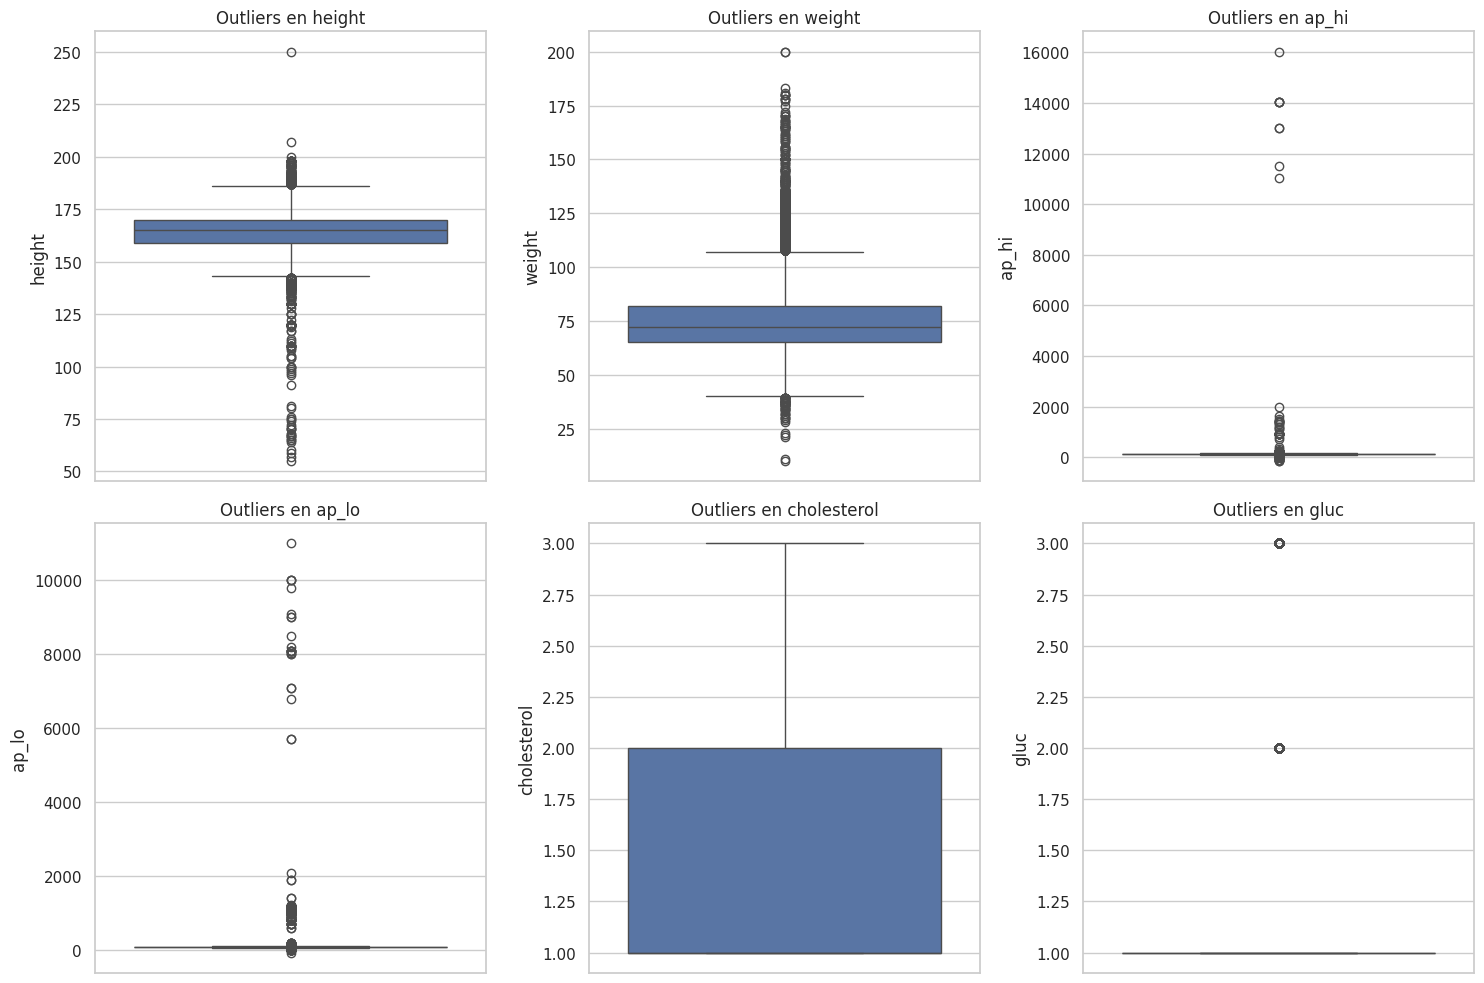

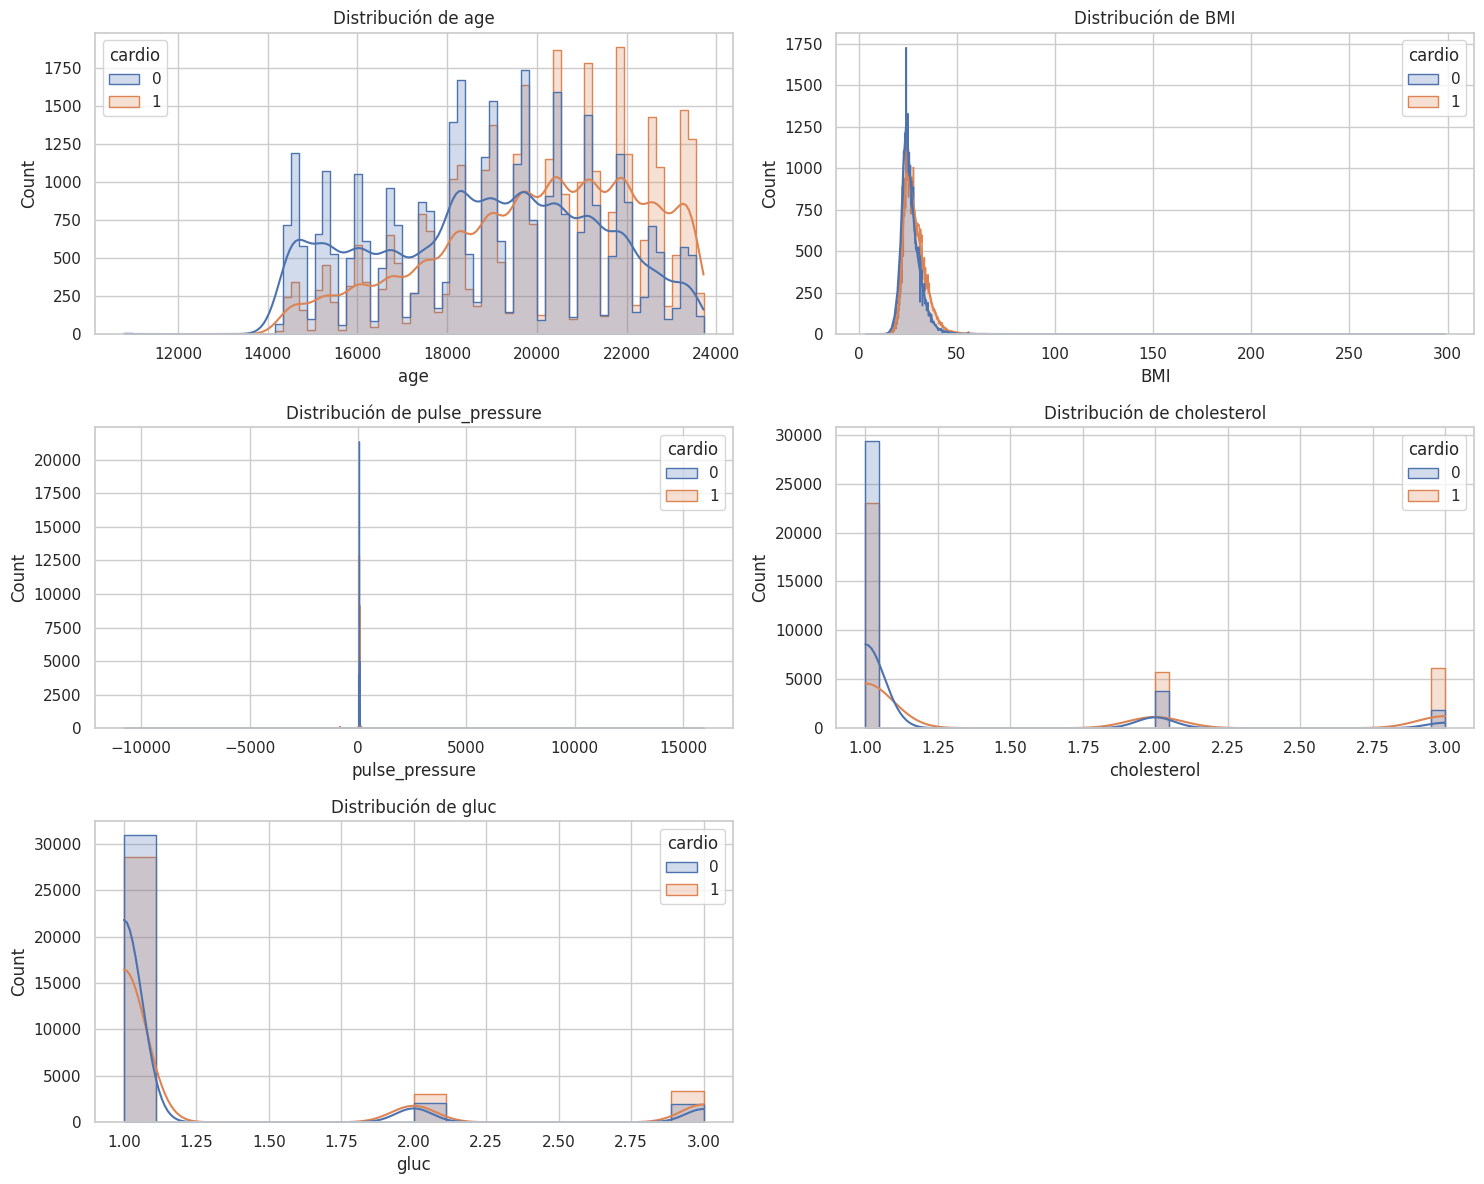

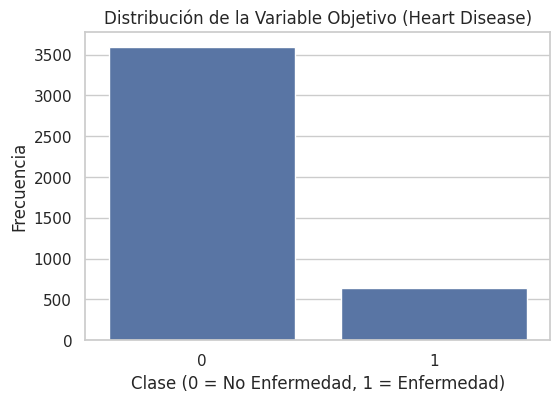

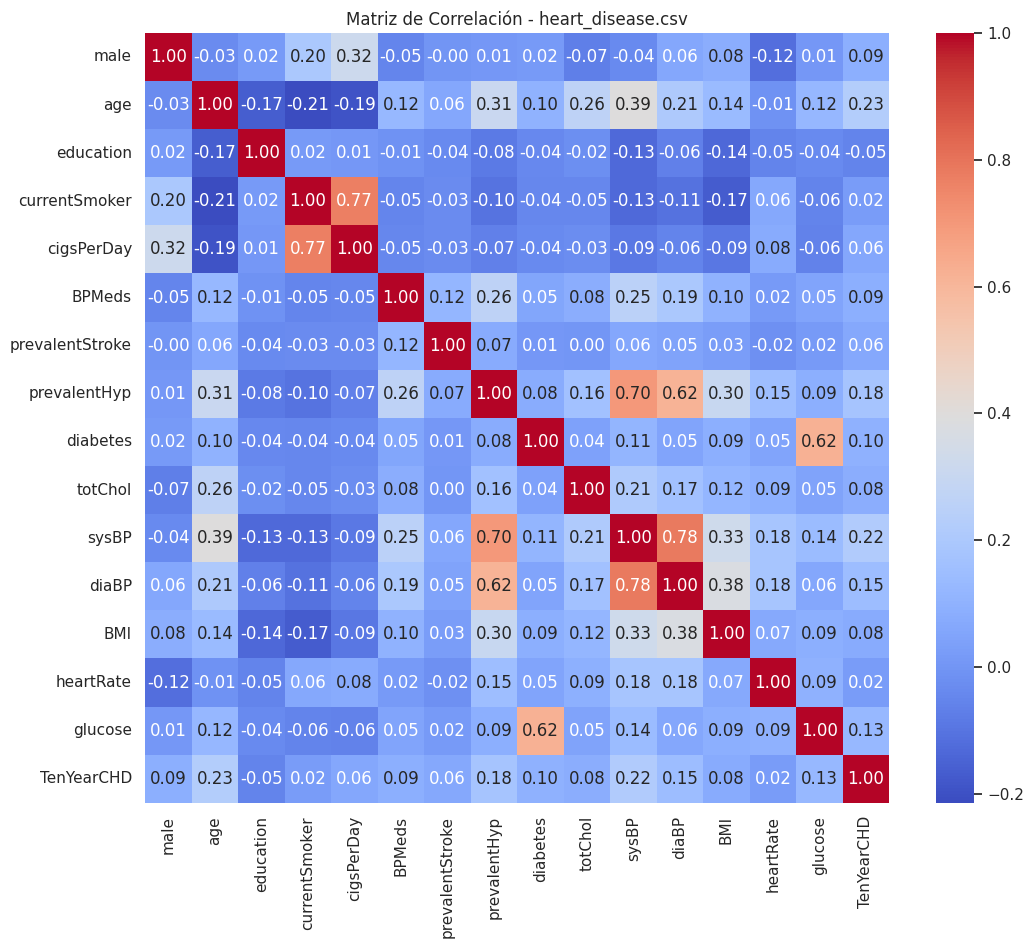

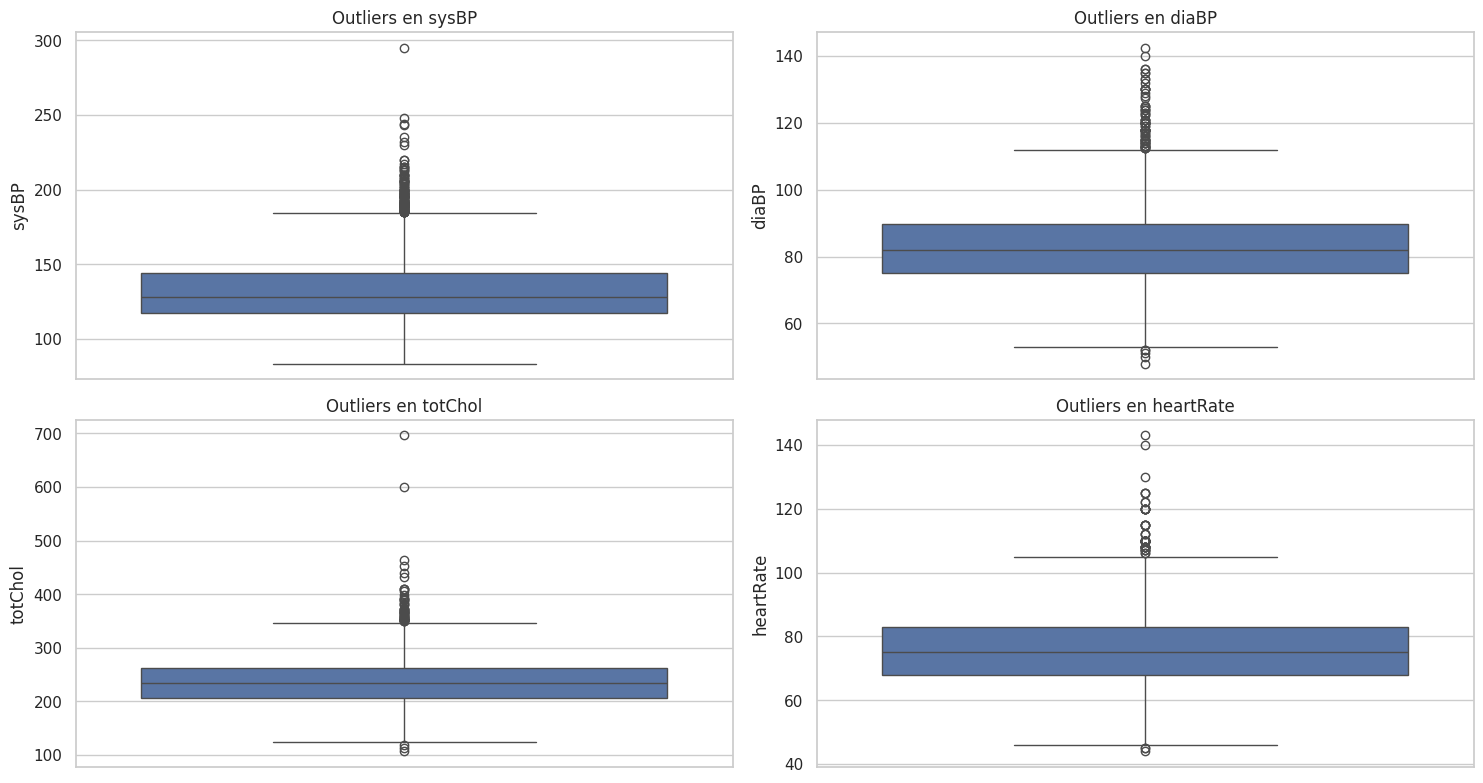

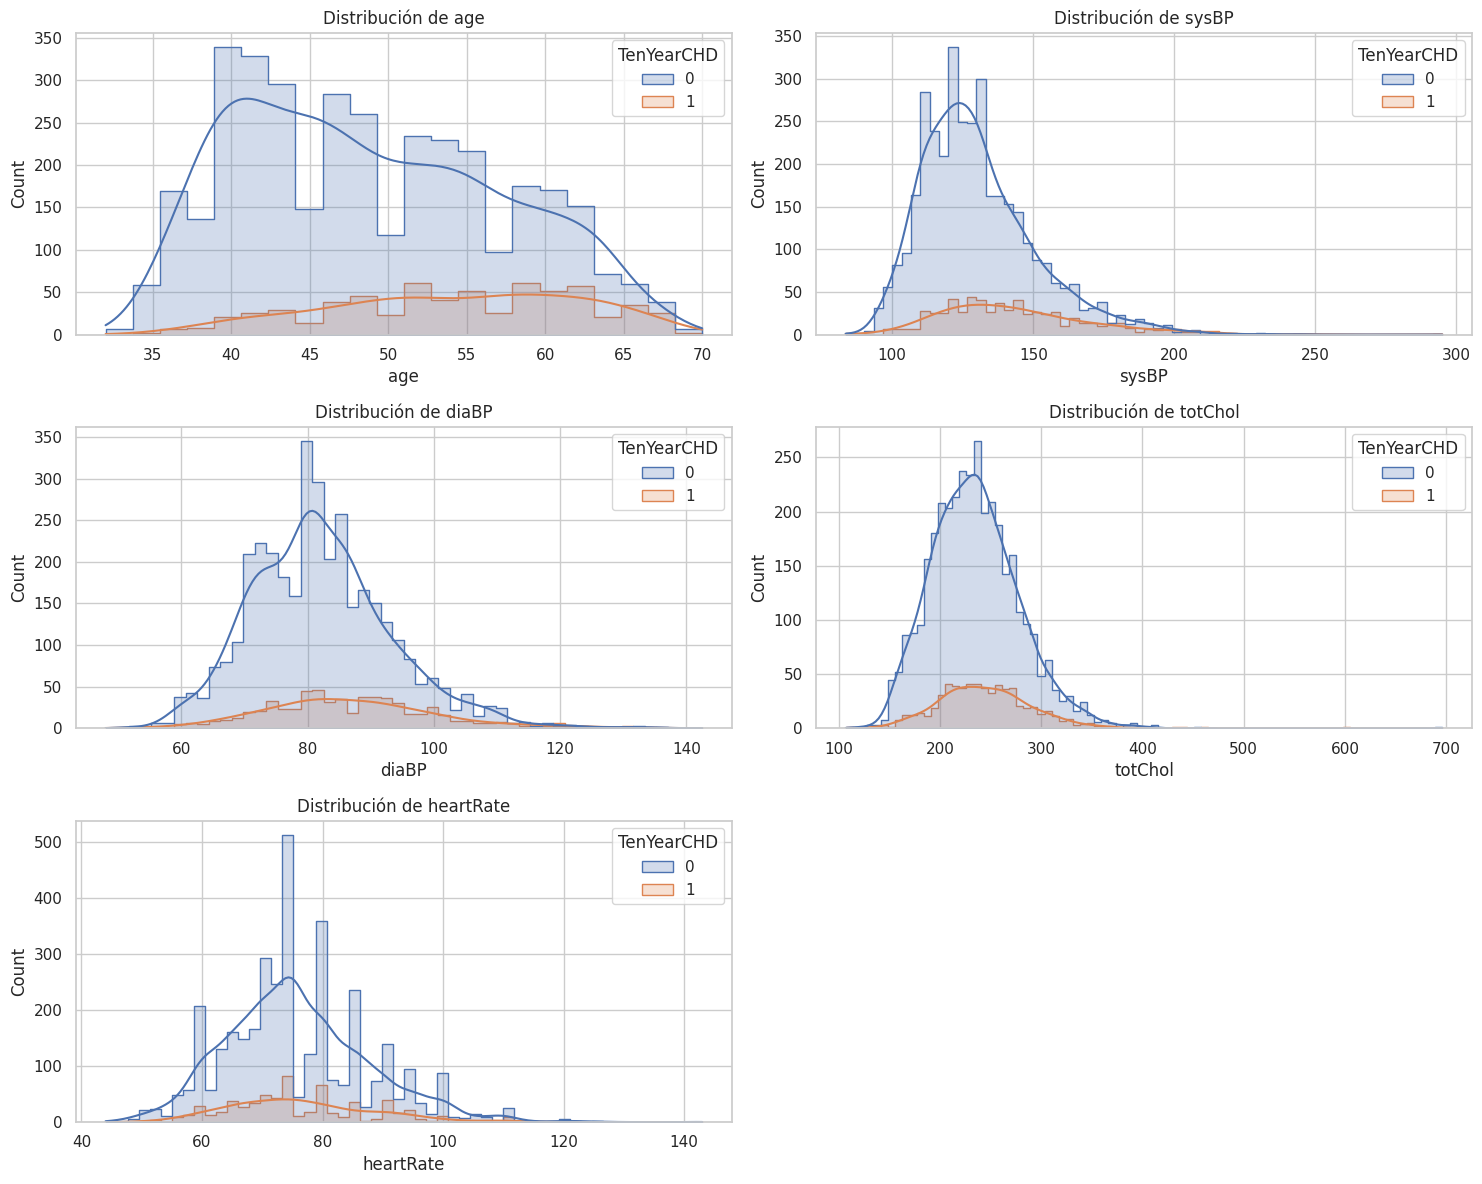

In [ ]:
# Análisis Exploratorio de Datos (EDA) para cardio_train.csv y heart_disease.csv

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# -----------------------------
# EDA para cardio_train.csv
# -----------------------------

# 1. Distribución de la variable objetivo (cardio)
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=cardio_data)
plt.title('Distribución de la Variable Objetivo (Cardio)')
plt.xlabel('Clase (0 = No Enfermedad, 1 = Enfermedad)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix_cardio = cardio_data.corr()
sns.heatmap(correlation_matrix_cardio, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación - cardio_train.csv')
plt.show()

# 3. Detección de outliers en variables clave
variables_outliers_cardio = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_outliers_cardio, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=cardio_data[var])
    plt.title(f'Outliers en {var}')
plt.tight_layout()
plt.show()

# 4. Distribución de variables clave según la presencia de enfermedad
# Cálculo de BMI y pulse_pressure si aún no están creados
if 'BMI' not in cardio_data.columns:
    cardio_data['BMI'] = cardio_data['weight'] / ((cardio_data['height'] / 100) ** 2)
if 'pulse_pressure' not in cardio_data.columns:
    cardio_data['pulse_pressure'] = cardio_data['ap_hi'] - cardio_data['ap_lo']

variables_to_explore_cardio = ['age', 'BMI', 'pulse_pressure', 'cholesterol', 'gluc']

plt.figure(figsize=(15, 12))
for i, var in enumerate(variables_to_explore_cardio, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=cardio_data, x=var, hue='cardio', kde=True, element='step')
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

# -----------------------------
# EDA para heart_disease.csv
# -----------------------------

# 1. Distribución de la variable objetivo (TenYearCHD)
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=heart_data)
plt.title('Distribución de la Variable Objetivo (Heart Disease)')
plt.xlabel('Clase (0 = No Enfermedad, 1 = Enfermedad)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix_heart = heart_data.corr()
sns.heatmap(correlation_matrix_heart, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación - heart_disease.csv')
plt.show()

# 3. Detección de outliers en variables clave
variables_outliers_heart = ['sysBP', 'diaBP', 'totChol', 'heartRate']

plt.figure(figsize=(15, 8))
for i, var in enumerate(variables_outliers_heart, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=heart_data[var])
    plt.title(f'Outliers en {var}')
plt.tight_layout()
plt.show()

# 4. Distribución de variables clave según la presencia de enfermedad
variables_to_explore_heart = ['age', 'sysBP', 'diaBP', 'totChol', 'heartRate']

plt.figure(figsize=(15, 12))
for i, var in enumerate(variables_to_explore_heart, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=heart_data, x=var, hue='TenYearCHD', kde=True, element='step')
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()


### **¿Qué hace este bloque?**
1- Eliminación de Duplicados:

Se eliminan registros duplicados para evitar sesgos en el análisis.

2- Imputación de Valores Faltantes:

Se rellenan los valores faltantes con la mediana de cada columna numérica, asegurando que no haya datos nulos que puedan afectar el rendimiento del modelo.

3- Normalización de Variables Numéricas:

Se aplica la normalización utilizando StandardScaler para escalar variables clave, garantizando que todas tengan una distribución similar, lo que mejora la estabilidad del modelo.

4- Verificación:

Se incluye una verificación para confirmar que el preprocesamiento se ha realizado correctamente.

In [ ]:
# Preprocesamiento de Datos para cardio_train.csv y heart_disease.csv

from sklearn.preprocessing import StandardScaler

# -----------------------------
# Preprocesamiento para cardio_train.csv
# -----------------------------

# 1. Eliminación de duplicados si existen
cardio_data = cardio_data.drop_duplicates()

# 2. Imputación de valores faltantes (si los hay)
cardio_data = cardio_data.fillna(cardio_data.median())

# 3. Normalización de variables numéricas
scaler = StandardScaler()
columns_to_scale_cardio = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'BMI', 'pulse_pressure']

# Asegurarse de que BMI y pulse_pressure estén calculados
if 'BMI' not in cardio_data.columns:
    cardio_data['BMI'] = cardio_data['weight'] / ((cardio_data['height'] / 100) ** 2)
if 'pulse_pressure' not in cardio_data.columns:
    cardio_data['pulse_pressure'] = cardio_data['ap_hi'] - cardio_data['ap_lo']

# Aplicar la normalización
cardio_data[columns_to_scale_cardio] = scaler.fit_transform(cardio_data[columns_to_scale_cardio])

# -----------------------------
# Preprocesamiento para heart_disease.csv
# -----------------------------

# 1. Eliminación de duplicados si existen
heart_data = heart_data.drop_duplicates()

# 2. Imputación de valores faltantes (si los hay)
heart_data = heart_data.fillna(heart_data.median())

# 3. Normalización de variables numéricas
columns_to_scale_heart = ['sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose', 'BMI']

# Asegurarse de que BMI esté calculado si no existe
if 'BMI' not in heart_data.columns:
    heart_data['BMI'] = heart_data['weight'] / ((heart_data['height'] / 100) ** 2)

# Aplicar la normalización
heart_data[columns_to_scale_heart] = scaler.fit_transform(heart_data[columns_to_scale_heart])

# Verificación de que el preprocesamiento se realizó correctamente
print("Preprocesamiento completado para ambos datasets.")


Preprocesamiento completado para ambos datasets.


### **¿Qué hace este bloque?**
Este bloque de código divide los datasets cardio_train.csv y heart_disease.csv en conjuntos de entrenamiento (80%) y prueba (20%), asegurando que la distribución de la variable objetivo se mantenga equilibrada mediante stratify.

Se eliminan las columnas irrelevantes (id y la variable objetivo) para evitar sesgos en el modelo. Se usa random_state=42 para garantizar reproducibilidad. Finalmente, se imprimen los tamaños de los conjuntos generados y se confirma la correcta división de los datos. Este paso es esencial para evaluar el modelo con datos no vistos y evitar sobreajuste.

In [ ]:
from sklearn.model_selection import train_test_split

# -----------------------------
# División del Dataset cardio_train.csv
# -----------------------------

# Definir variables predictoras (X) y variable objetivo (y)
X_cardio = cardio_data.drop(columns=['cardio', 'id'], errors='ignore')  # Eliminamos la variable objetivo y 'id' si existe
y_cardio = cardio_data['cardio']

# División en entrenamiento (80%) y prueba (20%)
X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(X_cardio, y_cardio, test_size=0.2, random_state=42, stratify=y_cardio)

print(f"Tamaño del conjunto de entrenamiento - Cardio: {X_train_cardio.shape}")
print(f"Tamaño del conjunto de prueba - Cardio: {X_test_cardio.shape}")

# -----------------------------
# División del Dataset heart_disease.csv
# -----------------------------

# Definir variables predictoras (X) y variable objetivo (y)
X_heart = heart_data.drop(columns=['TenYearCHD', 'id'], errors='ignore')  # Eliminamos la variable objetivo y 'id' si existe
y_heart = heart_data['TenYearCHD']

# División en entrenamiento (80%) y prueba (20%)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

print(f"Tamaño del conjunto de entrenamiento - Heart Disease: {X_train_heart.shape}")
print(f"Tamaño del conjunto de prueba - Heart Disease: {X_test_heart.shape}")

print("División de datos completada.")


Tamaño del conjunto de entrenamiento - Cardio: (56000, 13)
Tamaño del conjunto de prueba - Cardio: (14000, 13)
Tamaño del conjunto de entrenamiento - Heart Disease: (3390, 15)
Tamaño del conjunto de prueba - Heart Disease: (848, 15)
División de datos completada.


### **¿Qué hace este bloque?**
**Este código realiza un flujo completo de machine learning, que incluye:**

 1. Carga y preprocesamiento de datos.  
 2. Balanceo de clases con SMOTE (solo para heart_disease.csv).
 3. Entrenamiento de modelos (Random Forest y StackingClassifier).
 4. Optimización de hiperparámetros con GridSearchCV.
 5. Evaluación de modelos mediante métricas de clasificación y curvas ROC.
 6. Visualización de resultados.


Mejores parámetros encontrados: {'final_estimator__C': 0.1}
Reporte de Clasificación (Heart Disease - 10 años):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1090
           1       0.92      0.87      0.90      1067

    accuracy                           0.90      2157
   macro avg       0.90      0.90      0.90      2157
weighted avg       0.90      0.90      0.90      2157



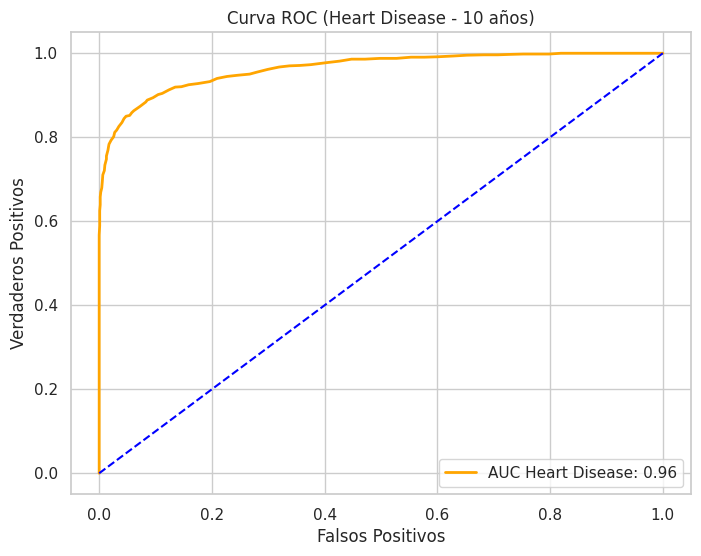

AUC final optimizado: 0.8043
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10461
           1       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



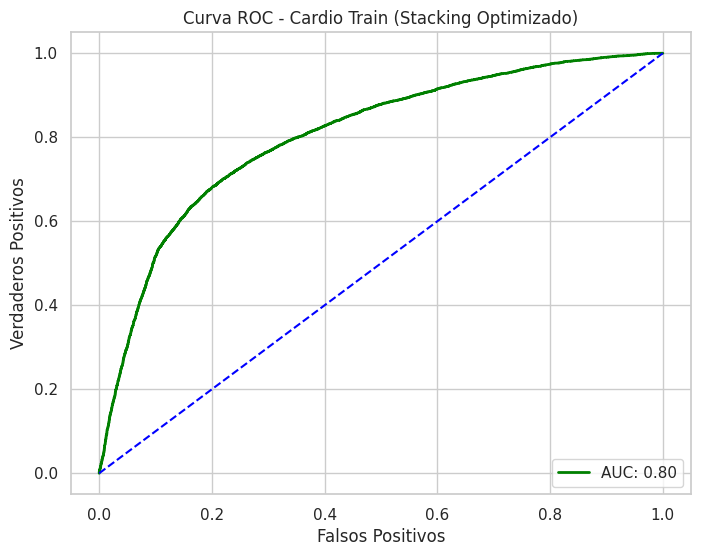

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar ambos datasets con separadores correctos
file_path_heart = '/content/heart_disease.csv'
file_path_cardio = '/content/cardio_train.csv'

# Cargar datasets con el separador correcto
data_heart = pd.read_csv(file_path_heart, sep=';')
data_cardio = pd.read_csv(file_path_cardio, sep=';')

# Eliminar columna 'id' de cardio_train.csv si existe
if 'id' in data_cardio.columns:
    data_cardio.drop('id', axis=1, inplace=True)

# Imputar valores faltantes con la mediana
data_heart.fillna(data_heart.median(numeric_only=True), inplace=True)
data_cardio.fillna(data_cardio.median(numeric_only=True), inplace=True)

# Convertir todas las columnas a tipo numérico para evitar problemas en scikit-learn
data_heart = data_heart.apply(pd.to_numeric, errors='coerce')
data_cardio = data_cardio.apply(pd.to_numeric, errors='coerce')

# Definir X e y para heart_disease.csv (con SMOTE)
X_heart = data_heart.drop('TenYearCHD', axis=1)
y_heart = data_heart['TenYearCHD']

# Definir X e y para cardio_train.csv
X_cardio = data_cardio.drop('cardio', axis=1)
y_cardio = data_cardio['cardio']

# Aplicar SMOTE solo a heart_disease.csv
smote = SMOTE(random_state=42)
X_heart_resampled, y_heart_resampled = smote.fit_resample(X_heart, y_heart)

# Dividir datos heart_disease.csv
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart_resampled, y_heart_resampled, test_size=0.3, random_state=42)

# Dividir datos cardio_train.csv en entrenamiento y prueba (sin SMOTE)
X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(X_cardio, y_cardio, test_size=0.3, random_state=42)

# Definir modelos Random Forest para heart_disease
model_heart = RandomForestClassifier(n_estimators=100, random_state=42)

# Definir modelos base para StackingClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Definir el modelo Stacking
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('hgb', hgb)],
    final_estimator=logreg
)

# Definir la grilla de parámetros con nombres correctos
param_grid = {
    'final_estimator__C': [0.1, 1, 10]  # Corrección en los parámetros de LogisticRegression
}

# Asegurar que no hay valores NaN antes de entrenar
X_train_cardio = X_train_cardio.fillna(0)
y_train_cardio = y_train_cardio.fillna(0)

# Inicializar y ejecutar GridSearchCV
grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_search.fit(X_train_cardio, y_train_cardio)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Entrenar modelos con los mejores parámetros
model_heart = RandomForestClassifier(n_estimators=100, random_state=42)
model_heart.fit(X_train_heart, y_train_heart)

best_model = grid_search.best_estimator_
best_model.fit(X_train_cardio, y_train_cardio)

# Evaluar Heart Disease
y_pred_heart = model_heart.predict(X_test_heart)
y_prob_heart = model_heart.predict_proba(X_test_heart)[:, 1]

print("Reporte de Clasificación (Heart Disease - 10 años):")
print(classification_report(y_test_heart, y_pred_heart))

# Curva ROC Heart Disease
fpr_heart, tpr_heart, _ = roc_curve(y_test_heart, y_prob_heart)
roc_auc_heart = auc(fpr_heart, tpr_heart)

plt.figure(figsize=(8, 6))
plt.plot(fpr_heart, tpr_heart, color='orange', lw=2, label=f'AUC Heart Disease: {roc_auc_heart:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Curva ROC (Heart Disease - 10 años)')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend(loc="lower right")
plt.show()

# Evaluar Stacking Optimizado
y_pred = best_model.predict(X_test_cardio)
y_prob = best_model.predict_proba(X_test_cardio)[:, 1]

auc_score = roc_auc_score(y_test_cardio, y_prob)
print(f"AUC final optimizado: {auc_score:.4f}")
print(classification_report(y_test_cardio, y_pred))

# Curva ROC Cardio Train
fpr, tpr, _ = roc_curve(y_test_cardio, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'AUC: {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Curva ROC - Cardio Train (Stacking Optimizado)')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend(loc="lower right")
plt.show()

### **¿Qué hace este bloque?**
**Interpretación de Resultados**

  - **1- AUC:**

  Ambos modelos tienen un AUC alto (> 0.80), lo que indica un buen rendimiento en la clasificación.

  El modelo de Random Forest en heart_disease.csv tiene un AUC superior, lo que sugiere que es más efectivo para distinguir entre las clases.

  ***2- Precisión, Recall y F1-Score:**

  El modelo de StackingClassifier tiene una precisión y recall más bajos, lo que indica que es peor para predecir correctamente los casos positivos (enfermedad).

  ***3- Matriz de Confusión:**

  El modelo de Random Forest en heart_disease.csv tiene menos falsos positivos y falsos negativos en comparación con el StackingClassifier en cardio_train.csv.

### **Conclusión**

  El Random Forest en heart_disease.csv tiene un rendimiento ligeramente mejor que el StackingClassifier en cardio_train.csv, según las métricas evaluadas.

  Ambos modelos son efectivos para predecir enfermedades cardíacas, pero el Random Forest en heart_disease.csv es más preciso y tiene un AUC más alto.

  Esta evaluación integrada proporciona una comparación clara del rendimiento de los modelos en ambos datasets, lo que es útil para tomar decisiones informadas sobre su implementación en aplicaciones médicas.



Evaluación para heart_disease.csv (Random Forest):
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1090
           1       0.92      0.87      0.90      1067

    accuracy                           0.90      2157
   macro avg       0.90      0.90      0.90      2157
weighted avg       0.90      0.90      0.90      2157



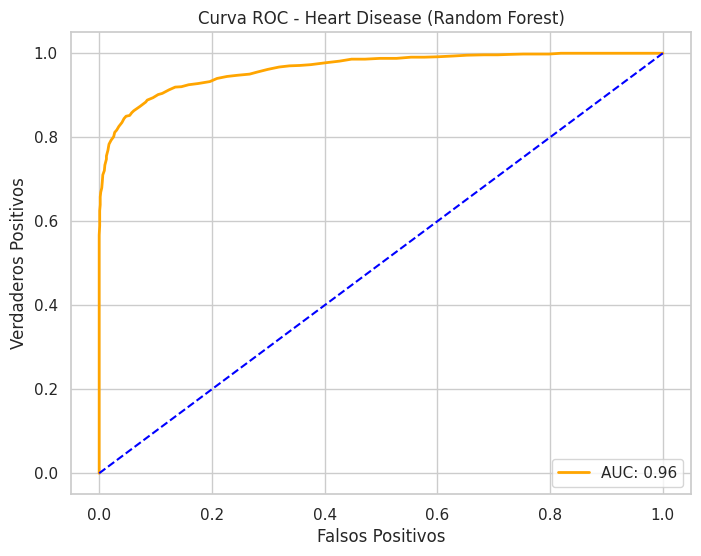

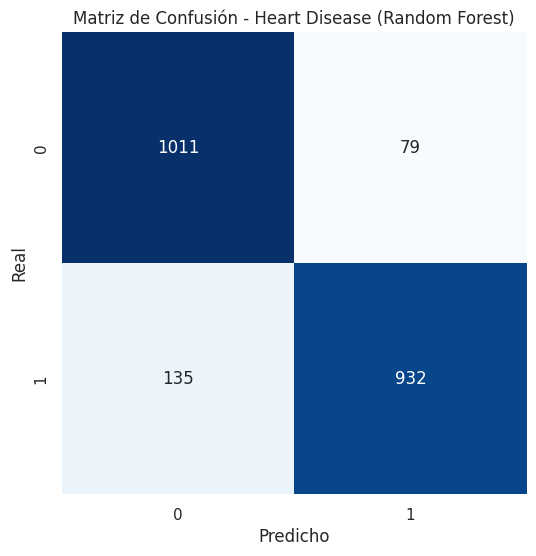


Evaluación para cardio_train.csv (StackingClassifier):
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10461
           1       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



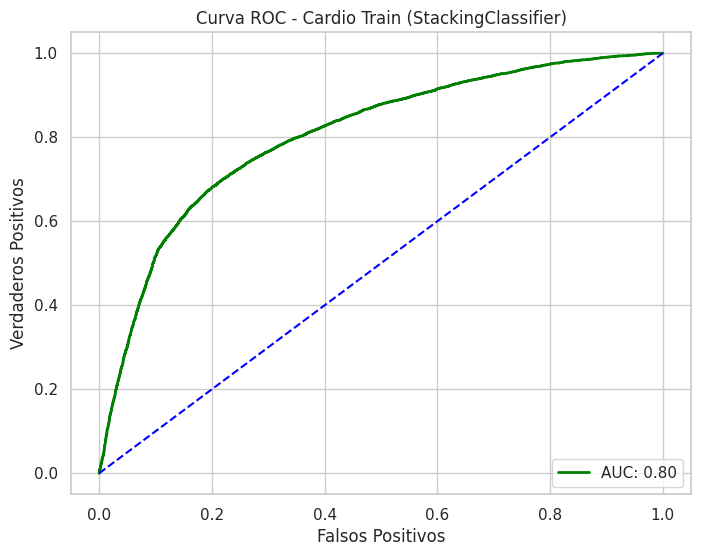

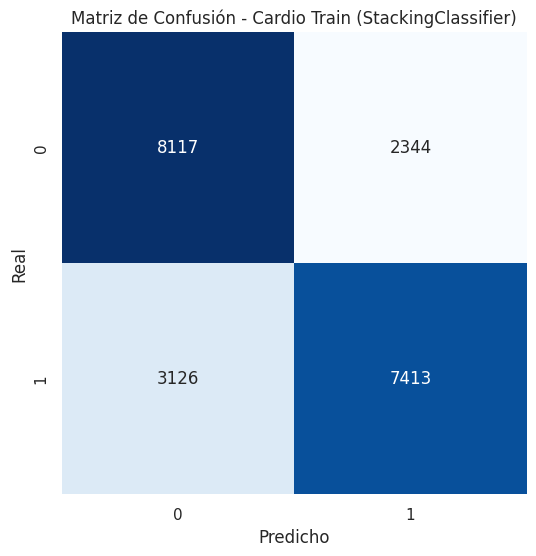

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, auc_score, title, color):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, lw=2, label=f'AUC: {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.title(title)
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.legend(loc="lower right")
    plt.show()

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# Evaluación para heart_disease.csv
print("Evaluación para heart_disease.csv (Random Forest):")
print("Reporte de Clasificación:")
print(classification_report(y_test_heart, y_pred_heart))

# Curva ROC y AUC
fpr_heart, tpr_heart, _ = roc_curve(y_test_heart, y_prob_heart)
roc_auc_heart = auc(fpr_heart, tpr_heart)
plot_roc_curve(fpr_heart, tpr_heart, roc_auc_heart, 'Curva ROC - Heart Disease (Random Forest)', 'orange')

# Matriz de Confusión
plot_confusion_matrix(y_test_heart, y_pred_heart, 'Matriz de Confusión - Heart Disease (Random Forest)')

# Evaluación para cardio_train.csv
print("\nEvaluación para cardio_train.csv (StackingClassifier):")
print("Reporte de Clasificación:")
print(classification_report(y_test_cardio, y_pred))

# Curva ROC y AUC
fpr_cardio, tpr_cardio, _ = roc_curve(y_test_cardio, y_prob)
roc_auc_cardio = auc(fpr_cardio, tpr_cardio)
plot_roc_curve(fpr_cardio, tpr_cardio, roc_auc_cardio, 'Curva ROC - Cardio Train (StackingClassifier)', 'green')

# Matriz de Confusión
plot_confusion_matrix(y_test_cardio, y_pred, 'Matriz de Confusión - Cardio Train (StackingClassifier)')